# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [5]:
display(temp)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.info() # we have obejcts (strings) and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [7]:
# your answer here
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
# your answer here
print(temp.loc[temp['State'] == 'New York'].mean())

Temperature    10.740741
dtype: float64


<ipython-input-8-1e25106dca99>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(temp.loc[temp['State'] == 'New York'].mean())


#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
# your answer here
temp.loc[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
# your answer here
temp.loc[temp['Temperature'] > 15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [11]:
# your answer here
temp.loc[(temp['Temperature'] > 15)&(temp['Temperature'] < 20)]['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
# your answer here
for state in temp.State.unique():
    atemp = temp.loc[temp['State'] == state].mean()[0]
    std = temp.loc[temp['State'] == state].std()[0]
    print(f"In {state} the mean of the temperature is {atemp:.2f} and the standard deviation {std:.2f}.")
    


In New York the mean of the temperature is 10.74 and the standard deviation 8.13.
In Connecticut the mean of the temperature is 15.83 and the standard deviation 1.96.
In New Jersey the mean of the temperature is 21.11 and the standard deviation 1.57.


<ipython-input-12-88fd36bf5b79>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  atemp = temp.loc[temp['State'] == state].mean()[0]
<ipython-input-12-88fd36bf5b79>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = temp.loc[temp['State'] == state].std()[0]


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# your answer here
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
# your answer here
employee.info() # we have  4 obejcts and 2 integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

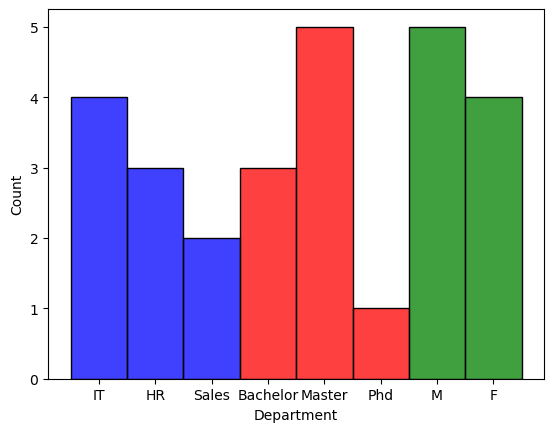

In [15]:
# your answer here
# sns.histplot(x=employee.Name, color='b')
# plt.show()
# # There is only one person with each name. 
sns.histplot(x=employee.Department, color='b')
sns.histplot(x=employee.Education, color='r')
sns.histplot(x=employee.Gender, color='g')

# In this three histograms we see that most of the people working in the company have a master degree, and are placed in it. 
# Almost half of the people working in the ocmpany are women, there is one more man though. 

plt.show()

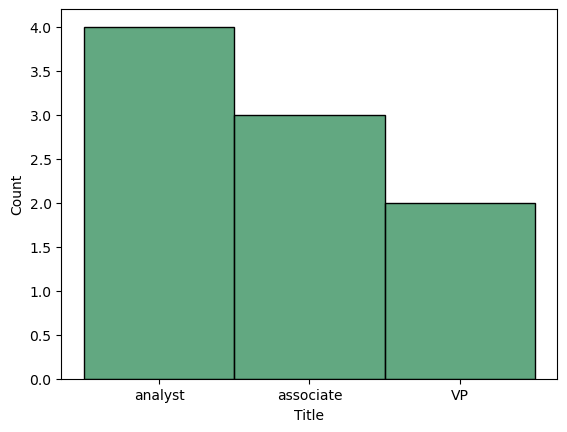

In [16]:
sns.histplot(x=employee.Title, color='seagreen',kde = False)
plt.show()
# Most of the employees work as analysts

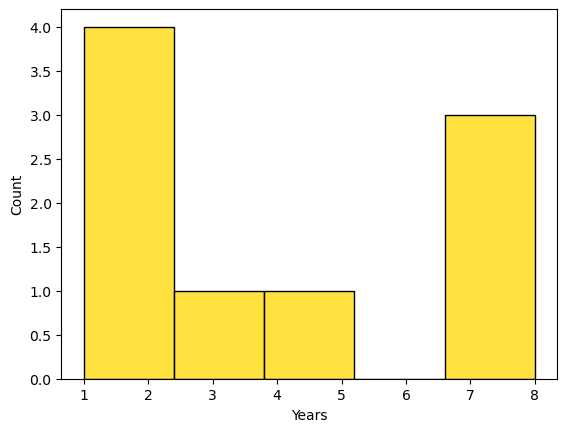

In [17]:
sns.histplot(x=employee.Years, color='gold')
plt.show()
# There has been a lot of hiring in the last 2 years, and the oldest employee in the company has been there for 8 years. 

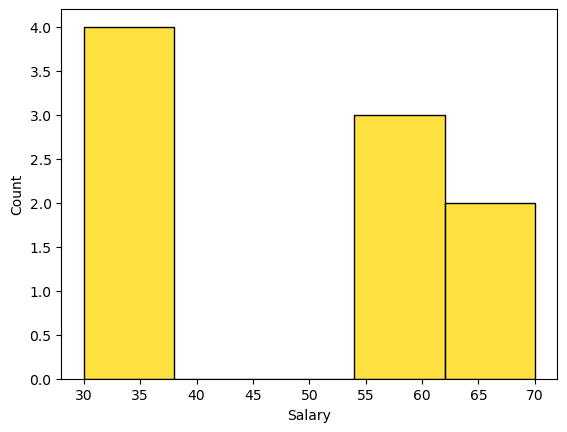

In [18]:
sns.histplot(x=employee.Salary, color='gold')
plt.show()
# Half of the staff have a salary between 30 and 38 dollars, but half of them have a salary over 55. 

#### What's the average salary in this company?

In [19]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [20]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [21]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [22]:
# your answer here
employee.loc[employee.Salary == employee.Salary.min()].Name

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [23]:
# your answer here
employee.loc[employee.Name =='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [24]:
# your answer here
list(employee.loc[employee.Name =='David'].Salary)[0]

30

#### Print all the rows where job title is associate

In [25]:
# your answer here
employee.loc[employee.Title =='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [26]:
# your answer here- 1 method
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [27]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [28]:
# your answer here
employee.loc[(employee.Title =='associate')&(employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [29]:
# your answer here
employee.groupby('Years').mean().Salary

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [30]:
# your answer here
employee.groupby('Title').mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

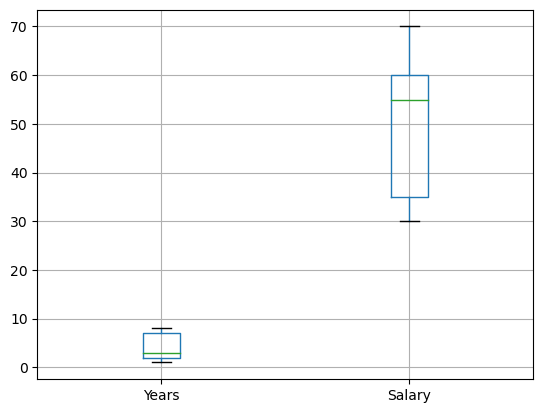

In [31]:
# draw boxplot here
employee.boxplot()
plt.show()

In [32]:
# print first quartile here
employee.describe().T['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [33]:
# print third quartile here
employee.describe().T['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [34]:
# your answer here
employee.loc[(employee['Gender'] =='F')].Salary.mean() == employee.loc[(employee['Gender'] =='M')].Salary.mean()
print( employee.loc[(employee['Gender'] =='F')].Salary.mean() == employee.loc[(employee['Gender'] =='M')].Salary.mean())
print('Women:',employee.loc[(employee['Gender'] =='F')].Salary.mean(),'Men', employee.loc[(employee['Gender'] =='M')].Salary.mean()
)

False
Women: 47.5 Men 50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [35]:
# your answer here
employee.describe().T.drop(columns = ['count','std','25%','75%','50%']).T

,Years,Salary
mean,4.111111,48.888889
min,1.000000,30.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [36]:
# your answer here
employee.groupby('Department').Salary.agg(lambda x: max(x)-min(x))


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [37]:
# your answer here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [38]:
# your answer here
orders.info()
# we are going to study a dataset with 19 columns, most of them are numeric value (8 int64 and 2 floats) 
# we can also observe 4 objects within the columns 
# The dataframe has 397924 rows with no NaNs among them. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [39]:
# your answer here
orders.describe()
# The data was gathered among the years 2010 and 2011, during all year. 
# #During work hours (between 6 and 20) and most of the data was taken between 11 and 14h.
# The quantites have a very high variation, although most of the them are below 12 there are very large quantites that affect the mean.
# Same thing happens with the unit price, that varies around 2, but have very large values that affect the mean. 
# The very same thing happens with the amount spent, which is directely related to the amount spent and the quantities. 

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [40]:
# your answer here
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [41]:
# your answer here
orders.UnitPrice.max() # highest

8142.75

In [42]:
# your answer here
orders.UnitPrice.min() # lowest

0.0

#### Select all the customers we have in Spain

In [43]:
# your answer here
orders[orders.Country=='Spain'].CustomerID.unique()


array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [44]:
# your answer here
len(orders[orders.Country=='Spain'].CustomerID.unique())

30

#### Select all the customers who have bought more than 50 items ?

In [45]:
# your answer here
dictio = dict(orders.CustomerID.value_counts())
print(orders[orders.CustomerID.isin([key  for key in dictio.keys() if dictio[key]>50])]['CustomerID'].unique())

[17850 13047 12583 ... 17914 14087 15471]


#### Select orders from Spain that are above 50 items

In [47]:
# your answer here
orders[(orders.Quantity > 50)&(orders.Country == 'Spain')].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0


#### Select all free orders

In [48]:
# your answer here
orders[orders.UnitPrice == 0].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [49]:
# your answer here
orders.loc[orders.Description.str.contains("lunch bag")].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [50]:
# your answer here
orders.loc[(orders.Description.str.contains("lunch bag"))&(orders.year == 2011)].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

In [51]:
# your answer here
orders[orders.Country == 'Spain'].groupby(['amount_spent']).count().year.head(3)

amount_spent
0.00    1
0.21    3
0.29    1
Name: year, dtype: int64

#### Select all orders made in the month of August

In [58]:
# your answer here
orders[orders.month == 8].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [82]:
# your answer here
orders.loc[orders.month == 8].groupby('Country').count().year


Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: year, dtype: int64

#### What's the  average amount of money spent by country

In [67]:
# your answer here
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [75]:
# your answer here
orders.loc[orders.UnitPrice == orders.UnitPrice.max()]['Description']

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [76]:
# your answer here
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64